In [12]:
import pandas as pd
import numpy as np
np.random.seed(1206)

import matplotlib.pyplot as plt
%matplotlib inline
# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 6

import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

import warnings
warnings.filterwarnings("ignore")

"""
在这儿：https://github.com/statsmodels/statsmodels/tree/master/statsmodels/tsa
下载holtwinters.py，tsamodel.py，并放在当前脚本所在路径下
"""

import sys, os
sys.path.append(os.getcwd())

from holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

'C:\\Users\\CDA\\68期Python机器学习'

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, subtitle, lags=31):
    print("自相关图和偏相关图,maxlags={}".format(lags))
    f = plt.figure(facecolor='white', figsize=(18,4))
    ax1 = f.add_subplot(121)
    plot_acf(ts, lags=lags, ax=ax1, title='ACF\n{}'.format(subtitle))
    ax2 = f.add_subplot(122)
    plot_pacf(ts, lags=lags, ax=ax2, title='PACF\n{}'.format(subtitle))
    plt.show()
    
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
   # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

# 白噪声检验：Ljung-Box test
def randomness(ts, lags=31):
    rdtest = acorr_ljungbox(ts,lags=lags)
    rddata = np.c_[range(1,lags+1),rdtest[1:][0]]
    rdoutput = pd.DataFrame(rddata,columns=['lags','p-value'])
    return rdoutput.set_index('lags')

### 练习一：模型定阶

###### 读入数据，做时序图

In [3]:
ex1_a = pd.read_csv('EX1_a.csv')
ex1_b = pd.read_csv('EX1_b.csv')
ex1_c = pd.read_csv('EX1_c.csv')
ex1_d = pd.read_csv('EX1_d.csv')

In [4]:
ex1_b.head()

,Unnamed: 0,x
0,1,0.699464
1,2,-1.696354
2,3,2.257708
3,4,-0.954396
4,5,1.491232


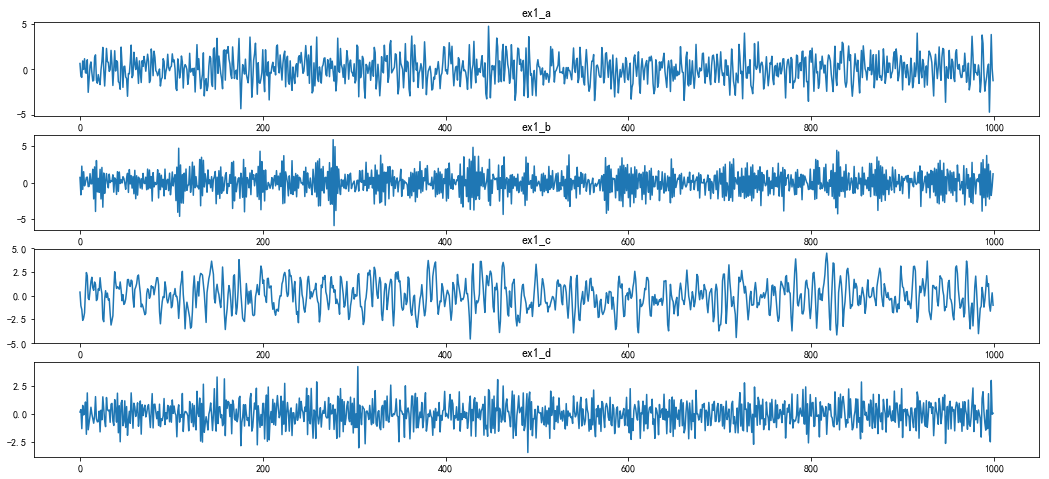

In [5]:
plt.figure(figsize = (18,8))

plt.subplot(411)
plt.title('ex1_a')
plt.plot(ex1_a.x)

plt.subplot(412)
plt.title('ex1_b')
plt.plot(ex1_b.x)

plt.subplot(413)
plt.title('ex1_c')
plt.plot(ex1_c.x)

plt.subplot(414)
plt.title('ex1_d')
plt.plot(ex1_d.x)


###### 检验序列的平稳性与随机性

In [6]:
test_stationarity(ex1_d.x)

Results of Dickey-Fuller Test:
Test Statistic                -1.867428e+01
p-value                        2.043760e-30
#Lags Used                     4.000000e+00
Number of Observations Used    9.950000e+02
Critical Value (1%)           -3.436939e+00
Critical Value (5%)           -2.864449e+00
Critical Value (10%)          -2.568319e+00
dtype: float64


ex1_a，ex1_b,ex1_c,ex1_d的p值都小于0.01，拒绝原假设，序列平稳

In [7]:
randomness(ex1_d.x, 7)

,p-value
lags,
1.0,2.347943e-33
2.0,2.474210e-32
3.0,2.140479e-31
4.0,1.322701e-30
5.0,3.623187e-30
6.0,3.907171e-30
7.0,2.012393e-29


p值小于0.01，拒绝原假设，序列为非白噪声

自相关图和偏相关图,maxlags=31


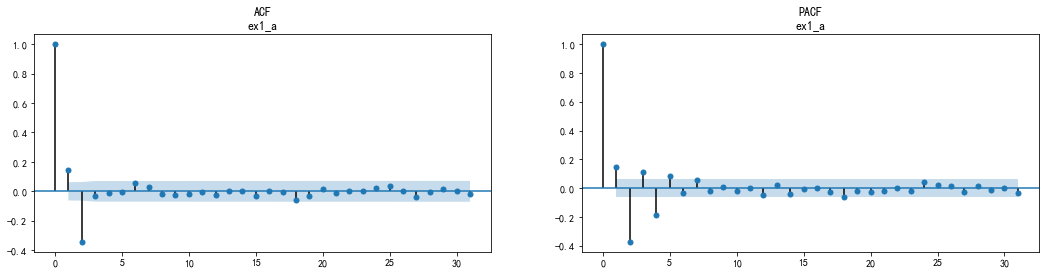

In [8]:
draw_acf_pacf(ex1_a.x,'ex1_a')

ACF两阶截尾，PACF指数衰减。  -- MA（2）

自相关图和偏相关图,maxlags=31


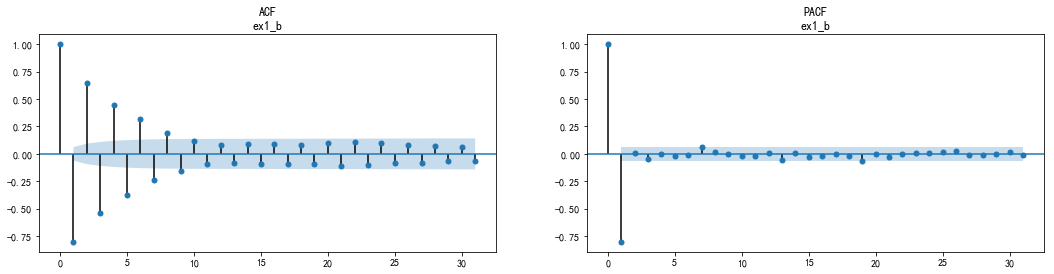

In [9]:
draw_acf_pacf(ex1_b.x,'ex1_b')

ACF指数衰减，PACF一阶截尾。 -- AR（1）

自相关图和偏相关图,maxlags=31


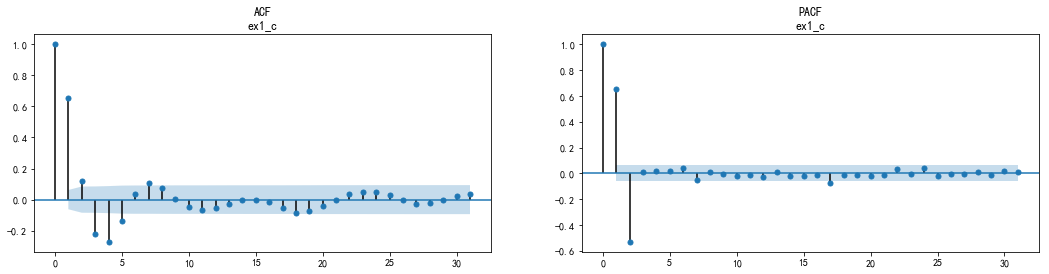

In [10]:
draw_acf_pacf(ex1_c.x,'ex1_c')

ACF指数衰减，PACF二阶截尾。 -- AR（2）

In [11]:
best_aic = np.inf  
best_order = None
best_mdl = None

pq_rng = range(4)
d_rng = range(1)

for p in pq_rng:
    for d in d_rng:
        for q in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(ex1_c.x,order=(p,d,q)).fit()
                tmp_aic = tmp_mdl.aic
                print('aic: {:6.5f}| order: {}'.format(tmp_aic,(p,d,q)))
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (p,d,q)
                    best_mdl = tmp_mdl
            except: 
                continue

print('\naic: {:6.5f}| order: {}'.format(best_aic,best_order))

aic: 3730.85143| order: (0, 0, 0)
aic: 3094.57442| order: (0, 0, 1)
aic: 3180.96218| order: (1, 0, 0)
aic: 2955.57422| order: (1, 0, 1)
aic: 2903.45971| order: (1, 0, 2)
aic: 2902.21665| order: (1, 0, 3)
aic: 2852.29277| order: (2, 0, 0)
aic: 2854.12120| order: (2, 0, 1)
aic: 2855.92714| order: (2, 0, 2)
aic: 2857.53016| order: (2, 0, 3)
aic: 2854.11111| order: (3, 0, 0)
aic: 2855.67139| order: (3, 0, 1)
aic: 2857.46718| order: (3, 0, 2)
aic: 2858.53561| order: (3, 0, 3)

aic: 2852.29277| order: (2, 0, 0)


自相关图和偏相关图,maxlags=31


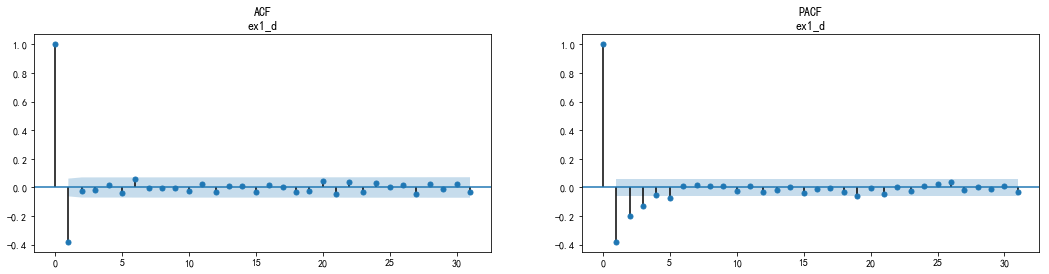

In [12]:
draw_acf_pacf(ex1_d.x,'ex1_d')

ACF一阶截尾，PACF指数衰减。 -- MA（1）

### 练习二：判断序列的平稳性

In [13]:
ex2_a = pd.read_csv('EX2_a.csv')
ex2_b = pd.read_csv('EX2_b.csv')

In [14]:
ex2_a.head()

,Year,depo
0,1950,83.5
1,1951,63.1
2,1952,71.0
3,1953,76.3
4,1954,70.5


In [15]:
ex2_b.head()

,Year,auto
0,1950,5.43
1,1951,6.19
2,1952,6.63
3,1953,7.18
4,1954,8.95


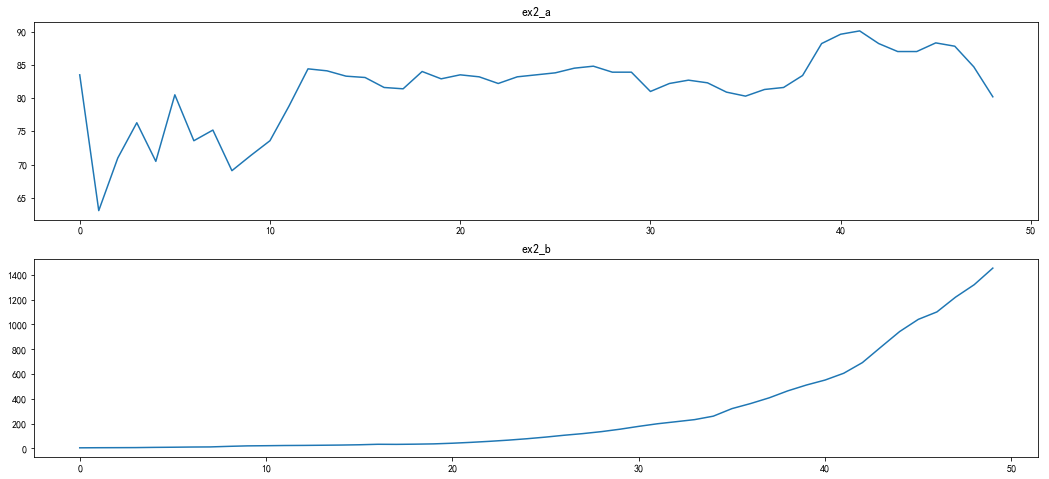

In [16]:
plt.figure(figsize = (18,8))

plt.subplot(211)
plt.title('ex2_a')
plt.plot(ex2_a.depo)

plt.subplot(212)
plt.title('ex2_b')
plt.plot(ex2_b.auto)

In [17]:
test_stationarity(ex2_a.depo)

Results of Dickey-Fuller Test:
Test Statistic                 -2.868465
p-value                         0.049140
#Lags Used                      1.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


p值大于0.01，序列不平稳

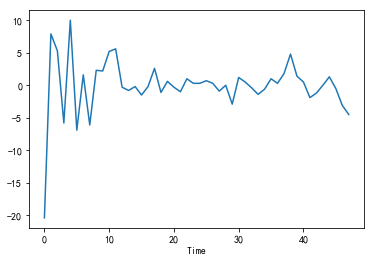

In [18]:
ex2_a_2 = np.diff(ex2_a.depo, n=1)
plt.plot(ex2_a_2)
plt.xlabel('Time');

In [19]:
test_stationarity(ex2_a_2)

Results of Dickey-Fuller Test:
Test Statistic                 -3.072615
p-value                         0.028647
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


一阶差分后仍然不平稳

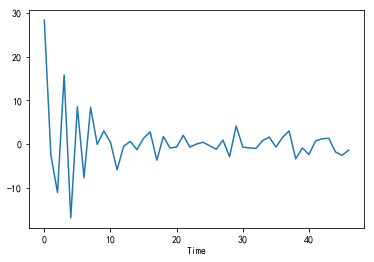

In [20]:
ex2_a_3 = np.diff(ex2_a_2, n=1)
plt.plot(ex2_a_3)
plt.xlabel('Time');

In [21]:
test_stationarity(ex2_a_3)

Results of Dickey-Fuller Test:
Test Statistic                 -5.289170
p-value                         0.000006
#Lags Used                      4.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


经两次差分，ex2_a序列平稳。

In [22]:
test_stationarity(ex2_b.auto)

Results of Dickey-Fuller Test:
Test Statistic                  1.754558
p-value                         0.998255
#Lags Used                     11.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


序列ex2_b,有明显的上升趋势，平稳性检验同样说明序列不平稳。

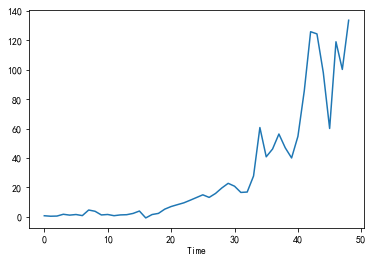

In [23]:
ex2_b_2 = np.diff(ex2_b.auto, n=1)
plt.plot(ex2_b_2)
plt.xlabel('Time');

In [24]:
test_stationarity(ex2_b_2)

Results of Dickey-Fuller Test:
Test Statistic                  2.117084
p-value                         0.998807
#Lags Used                     11.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


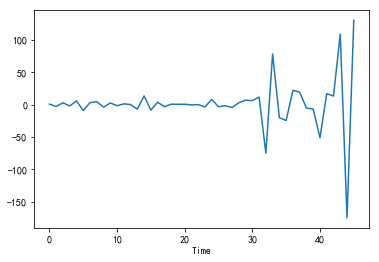

In [25]:
ex2_b_2 = np.diff(ex2_b.auto, n=4)
plt.plot(ex2_b_2)
plt.xlabel('Time');

In [26]:
test_stationarity(ex2_b_2)

Results of Dickey-Fuller Test:
Test Statistic                 -4.762261
p-value                         0.000064
#Lags Used                     10.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


四阶差分之后，序列平稳。

### 练习三：选择合适的模型拟合序列

In [27]:
ex3 = pd.read_csv('EX3.csv')

In [28]:
ex3.head()

,Unnamed: 0,300015.SZ.Open,300015.SZ.High,300015.SZ.Low,300015.SZ.Close,300015.SZ.Volume,300015.SZ.Adjusted
0,1,27.55013,27.55013,27.55013,27.55013,0,18.14953
1,2,27.55013,27.55013,27.55013,27.55013,0,18.14953
2,3,27.10003,27.85009,26.79003,27.65001,6607900,18.21533
3,4,27.21012,30.12003,27.20007,30.07009,14713900,19.80963
4,5,29.80013,30.15003,28.73002,29.21010,9550600,19.24309


In [29]:
ex3_check = ex3[['300015.SZ.Open','300015.SZ.High','300015.SZ.Low','300015.SZ.Close','300015.SZ.Adjusted']]

In [30]:
ex3_2 = ex3['300015.SZ.Close']

In [31]:
ex3_2.head()

0    27.55013
1    27.55013
2    27.65001
3    30.07009
4    29.21010
Name: 300015.SZ.Close, dtype: float64

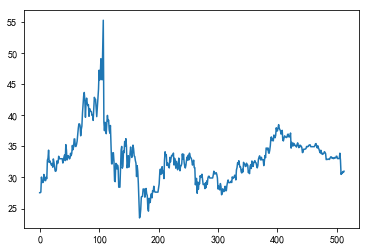

In [32]:
ex3_2.plot()

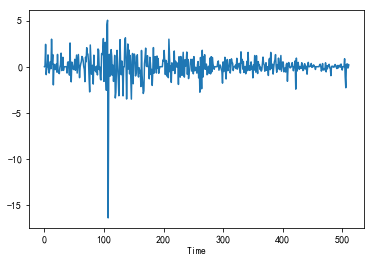

In [33]:
ex3_3 = np.diff(ex3_2, n=1)
plt.plot(ex3_3)
plt.xlabel('Time');

In [34]:
test_stationarity(ex3_3)

Results of Dickey-Fuller Test:
Test Statistic                -5.722184e+00
p-value                        6.900580e-07
#Lags Used                     1.300000e+01
Number of Observations Used    4.980000e+02
Critical Value (1%)           -3.443549e+00
Critical Value (5%)           -2.867361e+00
Critical Value (10%)          -2.569870e+00
dtype: float64


自相关图和偏相关图,maxlags=31


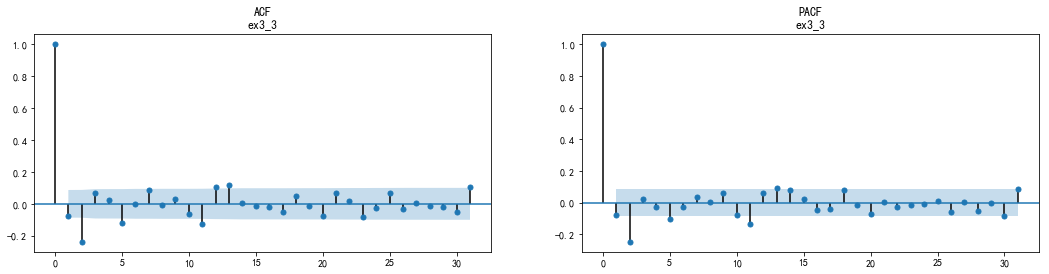

In [35]:
draw_acf_pacf(ex3_3,'ex3_3')

In [36]:
randomness(ex3_3, 7)

,p-value
lags,
1.0,7.877082e-02
2.0,8.712758e-08
3.0,1.380640e-07
4.0,4.472788e-07
5.0,4.741106e-08
6.0,1.485893e-07
7.0,7.690799e-08


In [37]:
best_aic = np.inf  
best_order = None
best_mdl = None

pq_rng = range(5)
d_rng = range(1)

for p in pq_rng:
    for d in d_rng:
        for q in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(ex3_3,order=(p,d,q)).fit()
                tmp_aic = tmp_mdl.aic
                print('aic: {:6.5f}| order: {}'.format(tmp_aic,(p,d,q)))
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (p,d,q)
                    best_mdl = tmp_mdl
            except: 
                continue

print('\naic: {:6.5f}| order: {}'.format(best_aic,best_order))

aic: 1676.11915| order: (0, 0, 0)
aic: 1672.31554| order: (0, 0, 1)
aic: 1645.59958| order: (0, 0, 2)
aic: 1647.23437| order: (0, 0, 3)
aic: 1649.21375| order: (0, 0, 4)
aic: 1675.04372| order: (1, 0, 0)
aic: 1660.59708| order: (1, 0, 1)
aic: 1647.27694| order: (1, 0, 2)
aic: 1645.13541| order: (2, 0, 0)
aic: 1646.76888| order: (2, 0, 1)
aic: 1648.75384| order: (2, 0, 2)
aic: 1643.48423| order: (2, 0, 4)
aic: 1646.81002| order: (3, 0, 0)
aic: 1648.76861| order: (3, 0, 1)
aic: 1649.18025| order: (3, 0, 2)
aic: 1644.22682| order: (3, 0, 3)
aic: 1645.43946| order: (3, 0, 4)
aic: 1648.44612| order: (4, 0, 0)
aic: 1648.12765| order: (4, 0, 1)
aic: 1648.78709| order: (4, 0, 2)
aic: 1645.78347| order: (4, 0, 3)
aic: 1643.85212| order: (4, 0, 4)

aic: 1643.48423| order: (2, 0, 4)


模型可定为ARIMA(2,1,4)

In [38]:
# fit ARIMA(2,1,4)
ex3_2_arima = smt.ARIMA(ex3_2,order=(2,1,4)).fit()
print(ex3_2_arima.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.300015.SZ.Close   No. Observations:                  512
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -813.742
Method:                       css-mle   S.D. of innovations              1.185
Date:                Thu, 22 Nov 2018   AIC                           1643.484
Time:                        08:48:37   BIC                           1677.391
Sample:                             1   HQIC                          1656.776
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0063      0.037      0.171      0.864      -0.066       0.079
ar.L1.D.300015.SZ.Close    -0.9289      0.082    -11.383      0.000      -1.089      -0.769


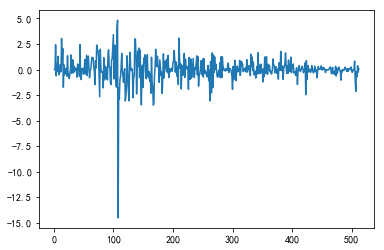

In [39]:
ex3_2_arima.resid.plot()

自相关图和偏相关图,maxlags=70


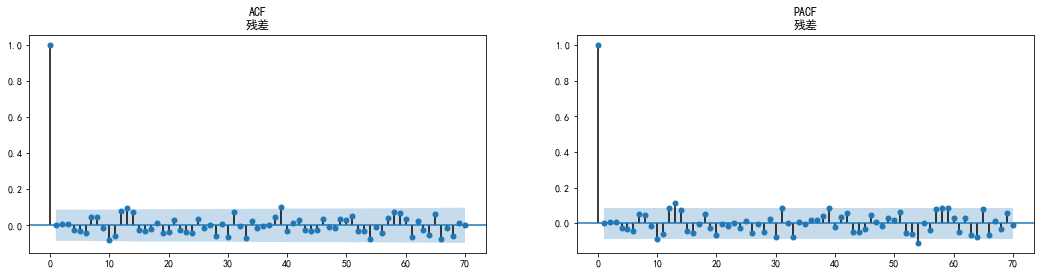

In [40]:
draw_acf_pacf(ex3_2_arima.resid, '残差', lags=70)

In [41]:
randomness(ex3_2_arima.resid, 7)

,p-value
lags,
1.0,0.990827
2.0,0.992912
3.0,0.998582
4.0,0.986383
5.0,0.970358
6.0,0.938010
7.0,0.884704


模型有效